https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/


In [7]:
# import modules
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
%matplotlib inline

In [8]:

# read data_set
data = pd.read_csv('https://raw.githubusercontent.com/kirenz/datasets/master/wage.csv')

data.head()

,Unnamed: 0,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


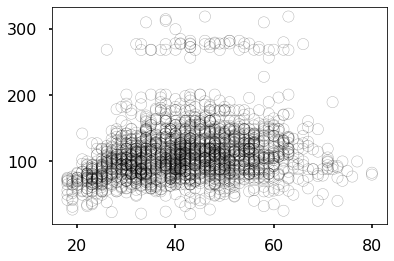

In [10]:
data_x = data['age']
data_y = data['wage']

# Dividing data into train and validation datasets
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=0.33, random_state = 1)

# Visualize the relationship b/w age and wage
import matplotlib.pyplot as plt
plt.scatter(train_x, train_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression

# Fitting linear regression model
x = train_x.reshape(1,-1)

#x = train_x

model = LinearRegression()
model.fit(x,train_y)
print(model.coef_)
print(model.intercept_)

AttributeError: 'Series' object has no attribute 'reshape'

In [14]:
#Generating weights for polynomial function with degree =2
weights = np.polyfit(train_x, train_y, 2)
print(weights)

[ -0.05194765   5.22868974 -10.03406116]


In [15]:
# Generating model with the given weights
model = np.poly1d(weights)

In [16]:
# Prediction on validation set
pred = model(valid_x)

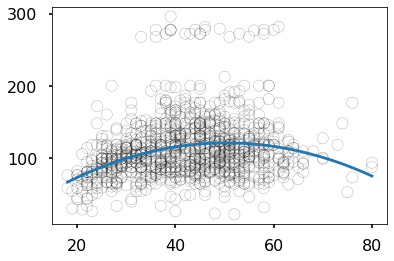

In [17]:
# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max(),70)
pred_plot = model(xp)
plt.scatter(valid_x, valid_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()

Introduction
As a beginner in the world of data science, the first algorithm I was introduced to was Linear Regression. I applied it to different datasets and noticed both it’s advantages and limitations.

It assumed a linear relationship between the dependent and independent variables, which was rarely the case in reality. As an improvement over this model, I tried Polynomial Regression which generated better results (most of the time). But using Polynomial Regression on datasets with high variability chances to result in over-fitting.



Source: Pingax

My model always became too flexible, which does not work well with unseen data. I then came across another non-linear approach known as Regression Splines. It uses a combination of linear/polynomial functions to fit the data.

In this article, we will go through some basics of linear and polynomial regression and study in detail the meaning of splines and their implementation in Python.

Note: To fully understand the concepts covered in this article, knowledge of linear and polynomial regression is required. You can learn more about them here.

Let’s get started!

 

Table of Contents
Understanding the Data
Quick Review of Linear Regression
Polynomial Regression: Improvement over Linear Regression
Walk-through of Regression Splines along with its Implementations
Piece wise Step Functions
Basis Functions
Piece wise Polynomials
Constraints and Splines
Cubic and Natural Cubic splines
Choosing the Number and Locations of the Knots
Comparison of Regression Splines with Polynomial Regression
 

Understanding the data
To understand the concepts, we will work on the wage prediction dataset which you can download here (this has been taken from the popular book: “Introduction to Statistical learning”).

Our dataset contains information like the ID, year, age, sex, marital status, race, education, region, job class, health, health insurance, log of wage and wage of various employees. In order to focus on spline regression in detail, I will use only ‘age’ as the independent variable to predict the wage (dependent variable).

Let’s start working on the data.

# import modules
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
%matplotlib inline

# read data_set
data = pd.read_csv("Wage.csv")

data.head()


data_x = data['age']
data_y = data['wage']

# Dividing data into train and validation datasets
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=0.33, random_state = 1)

# Visualize the relationship b/w age and wage
import matplotlib.pyplot as plt
plt.scatter(train_x, train_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.show()



What are your thoughts on the above scatter plot? Is it positively, negatively or not correlated at all? Please share your thoughts in the comments section below.

Introduction to Linear Regression
Linear regression is the simplest and most widely used statistical technique for predictive modelling. It is a supervised learning algorithm for solving regression based tasks.

It is called a linear model as it establishes a linear relationship between the dependent and independent variables. It basically gives us a linear equation like the one below where we have our features as independent variables with coefficients:

Here, we have Y as our dependent variable, the X’s are the independent variables and all betas are the coefficients. Coefficients are the weights assigned to the features. They signify the importance of each of the features. For example, if the outcome of an equation is highly dependent upon one feature (X1) as compared to any other feature, it means the coefficient/weight of the feature (X1) would have a higher magnitude as compared to any other feature.

So, let’s try to understand linear regression with only one feature, i.e., only one independent variable. It is called Simple Linear Regression. Therefore, our equation becomes,

As we are using only ‘age’ to predict the ‘wages’ of the employees, we will implement simple linear regression on the training dataset and calculate the error (RMSE) on the validation dataset.

from sklearn.linear_model import LinearRegression

# Fitting linear regression model
x = train_x.reshape(-1,1)
model = LinearRegression()
model.fit(x,train_y)
print(model.coef_)
print(model.intercept_)
-> array([0.72190831])
-> 80.65287740759283
# Prediction on validation dataset
valid_x = valid_x.reshape(-1,1)
pred = model.predict(valid_x)

# Visualisation
# We will use 70 plots between minimum and maximum values of valid_x for plotting
xp = np.linspace(valid_x.min(),valid_x.max(),70)
xp = xp.reshape(-1,1)
pred_plot = model.predict(xp)

plt.scatter(valid_x, valid_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()


We can now calculate the RMSE on the predictions.

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(valid_y, pred))
print(rms)
-> 40.436
We can infer from the above graph that linear regression is not capturing all the signals available and is not the best method for solving this wage prediction.

Although linear models are relatively simple to describe and implement and have advantages over other approaches in terms of interpretation and inference, they have significant limitations in terms of predictive power. This is because they assume the linear combination between the dependent and independent variables which is almost always an approximation, and sometimes a poor one.

In the other methods we will see below, we will set aside the linearity assumption while still attempting to maintain as much interpretability as possible. We will do this by examining very simple extensions of linear models like polynomial regression and step functions, as well as more sophisticated approaches such as splines.

 

Improvement over Linear Regression: Polynomial Regression
Consider these visualisations –



The plots above seem to be using a lot more signals between wage and age as compared to the linear plot. These plots are not linear in shape, hence they use a non-linear equation instead of a linear equation for establishing the relationship between age and wage. This type of regression technique, which uses a non linear function, is called Polynomial regression.

Polynomial regression extends the linear model by adding extra predictors, obtained by raising each of the original predictors to a power. For example, a cubic regression uses three variables, as predictors. This approach provides a simple way to provide a non-linear fit to data.

The standard method to extend linear regression to a non-linear relationship between the dependent and independent variables, has been to replace the linear model with a polynomial function.



As we increase the power value, the curve obtained contains high oscillations which will lead to shapes that are over-flexible. Such curves lead to over-fitting.

# Generating weights for polynomial function with degree =2
weights = np.polyfit(train_x, train_y, 2)
print(weights)
-> array([ -0.05194765,   5.22868974, -10.03406116])

# Generating model with the given weights
model = np.poly1d(weights)

# Prediction on validation set
pred = model(valid_x)
# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max(),70)
pred_plot = model(xp)
plt.scatter(valid_x, valid_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()
Similarly, we can plot polynomial curves for different degree values.







Unfortunately, polynomial regression has a fair number of issues as well. As we increase the complexity of the formula, the number of features also increases which is sometimes difficult to handle. Also, polynomial regression has a tendency to drastically over-fit, even on this simple one dimensional data set.

There are other issues with polynomial regression. For example, it is inherently non-local, i.e., changing the value of Y at one point in the training set can affect the fit of the polynomial for data points that are very far away. Hence, to avoid the use of high degree polynomial on the whole dataset, we can substitute it with many different small degree polynomial functions.

 

Walk-through of Regression Splines along with its Implementations
In order to overcome the disadvantages of polynomial regression, we can use an improved regression technique which, instead of building one model for the entire dataset, divides the dataset into multiple bins and fits each bin with a separate model. Such a technique is known as Regression spline.

Regression splines is one of the most important non linear regression techniques. In polynomial regression, we generated new features by using various polynomial functions on the existing features which imposed a global structure on the dataset. To overcome this, we can divide the distribution of the data into separate portions and fit linear or low degree polynomial functions on each of these portions.

The points where the division occurs are called Knots. Functions which we can use for modelling each piece/bin are known as Piecewise functions. There are various piecewise functions that we can use to fit these individual bins.

Piecewise Step Functions
One of the most common piecewise functions is a Step function. Step function is a function which remains constant within the interval. We can fit individual step functions to each of the divided portions in order to avoid imposing a global structure. Here we break the range of X into bins, and fit a different constant in each bin.

In [18]:
# Dividing the data into 4 bins
df_cut, bins = pd.cut(train_x, 4, retbins=True, right=True)
df_cut.value_counts(sort=False)

(17.938, 33.5]    504
(33.5, 49.0]      941
(49.0, 64.5]      511
(64.5, 80.0]       54
Name: age, dtype: int64

In [19]:
df_steps = pd.concat([train_x, df_cut, train_y], keys=['age','age_cuts','wage'], axis=1)

# Create dummy variables for the age groups
df_steps_dummies = pd.get_dummies(df_cut)
df_steps_dummies.head()

,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
1382,0,1,0,0
23,0,1,0,0
2140,0,0,1,0
1117,1,0,0,0
933,0,1,0,0


In [20]:
df_steps_dummies.columns = ['17.938-33.5','33.5-49','49-64.5','64.5-80'] 

# Fitting Generalised linear models
fit3 = sm.GLM(df_steps.wage, df_steps_dummies).fit()

# Binning validation set into same 4 bins
bin_mapping = np.digitize(valid_x, bins) 
X_valid = pd.get_dummies(bin_mapping)

# Removing any outliers
X_valid = pd.get_dummies(bin_mapping).drop([5], axis=1)

# Prediction
pred2 = fit3.predict(X_valid)

# Calculating RMSE
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid_y, pred2)) 
print(rms) 


39.99060078376046


In [21]:
# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max()-1,70) 
bin_mapping = np.digitize(xp, bins) 
X_valid_2 = pd.get_dummies(bin_mapping) 
pred2 = fit3.predict(X_valid_2)

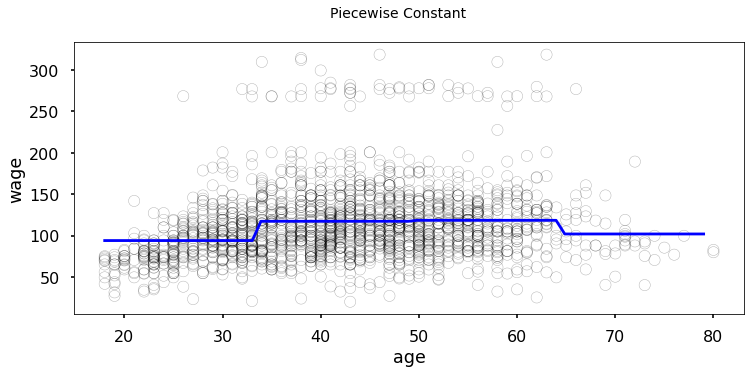

In [22]:
# Visualisation
fig, (ax1) = plt.subplots(1,1, figsize=(12,5))
fig.suptitle('Piecewise Constant', fontsize=14)

# Scatter plot with polynomial regression line
ax1.scatter(train_x, train_y, facecolor='None', edgecolor='k', alpha=0.3)
ax1.plot(xp, pred2, c='b')

ax1.set_xlabel('age')
ax1.set_ylabel('wage')
plt.show()

Binning has its obvious conceptual issues. Most prominently, we expect most phenomena we study to vary continuously with inputs. Binned regression does not create continuous functions of the predictor, so in most cases we would expect no relationship between the input and output.

For example, in the above graph, we can see that the first bin clearly misses the increasing trend of wage with age.



Basis Functions
To capture non-linearity in regression models, we need to transform some, or all of the predictors. To avoid having to treat every predictor as linear, we want to apply a very general family of transformations to our predictors. The family should be flexible enough to adapt (when the model is fit) to a wide variety of shapes, but not too flexible as to over-fit.

This concept of a family of transformations that can fit together to capture general shapes is called a basis function.

Piecewise Polynomials

Instead of fitting a constant function over different bins across the range of X, piecewise polynomial regression involves fitting separate low-degree polynomials over different regions of X. As we use lower degrees of polynomials, we don’t observe high oscillations of the curve around the data.

For example, a piecewise quadratic polynomial works by fitting a quadratic regression equation:

In other words, we fit two different polynomial functions to the data: one on the subset of the observations with xi < c, and one on the subset of the observations with xi ≥ c.

The first polynomial function has coefficients β01, β11, β21, β31 and the second has coefficients β02, β12, β22, β32. Each of these polynomial functions can be fit using the least squares error metric.

Remember that this family of polynomial functions has 8 degrees of freedom, 4 for each polynomial (as there are 4 variables).

Using more knots leads to a more flexible piecewise polynomial, as we use different functions for every bin. These functions depend only on the distribution of data of that particular bin. In general, if we place K different knots throughout the range of X, we will end up fitting K+1 different cubic polynomials. We can use any low degree polynomial to fit these individual bins. For example, we can instead fit piecewise linear functions. In fact, the stepwise functions used above are actually piecewise polynomials of degree 0.

Now we will look at some necessary conditions and constraints that should be followed while forming piecewise polynomials.

Cubic and Natural Cubic Splines

Cubic spline is a piecewise polynomial with a set of extra constraints (continuity, continuity of the first derivative, and continuity of the second derivative). 

In general, a cubic spline with K knots uses cubic spline with a total of 4 + K degrees of freedom. There is seldom any good reason to go beyond cubic-splines (unless one is interested in smooth derivatives).



In [23]:
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [24]:

# Generating cubic spline with 3 knots at 25, 40 and 60
transformed_x = dmatrix("bs(train, knots=(25,40,60), degree=3, include_intercept=False)", {"train": train_x},return_type='dataframe')

In [25]:

# Fitting Generalised linear model on transformed dataset
fit1 = sm.GLM(train_y, transformed_x).fit()


In [26]:

# Generating cubic spline with 4 knots
transformed_x2 = dmatrix("bs(train, knots=(25,40,50,65),degree =3, include_intercept=False)", {"train": train_x}, return_type='dataframe')


In [27]:

# Fitting Generalised linear model on transformed dataset
fit2 = sm.GLM(train_y, transformed_x2).fit()


In [28]:

# Predictions on both splines
pred1 = fit1.predict(dmatrix("bs(valid, knots=(25,40,60), include_intercept=False)", {"valid": valid_x}, return_type='dataframe'))
pred2 = fit2.predict(dmatrix("bs(valid, knots=(25,40,50,65),degree =3, include_intercept=False)", {"valid": valid_x}, return_type='dataframe'))


In [29]:
# Calculating RMSE values
rms1 = sqrt(mean_squared_error(valid_y, pred1))
print(rms1)

rms2 = sqrt(mean_squared_error(valid_y, pred2))
print(rms2)


39.40318768389144
39.34292609196198


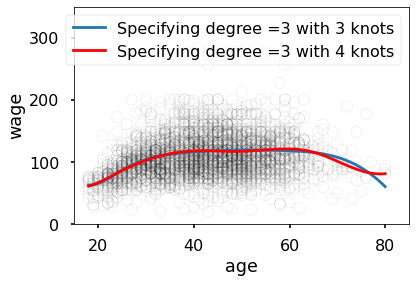

In [30]:

# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max(),70)

# Make some predictions
pred1 = fit1.predict(dmatrix("bs(xp, knots=(25,40,60), include_intercept=False)", {"xp": xp}, return_type='dataframe'))
pred2 = fit2.predict(dmatrix("bs(xp, knots=(25,40,50,65),degree =3, include_intercept=False)", {"xp": xp}, return_type='dataframe'))

# Plot the splines and error bands
plt.scatter(data.age, data.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred1, label='Specifying degree =3 with 3 knots')
plt.plot(xp, pred2, color='r', label='Specifying degree =3 with 4 knots')
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')
plt.show()

We know that the behavior of polynomials that are fit to the data tends to be erratic near the boundaries. Such variability can be dangerous. These problems are resembled by splines, too. The polynomials fit beyond the boundary knots behave even more wildly than the corresponding global polynomials in that region. To smooth the polynomial beyond the boundary knots, we will use a special type of spline known as Natural Spline.

A natural cubic spline adds additional constraints, namely that the function is linear beyond the boundary knots. This constrains the cubic and quadratic parts there to 0, each reducing the degrees of freedom by 2. That’s 2 degrees of freedom at each of the two ends of the curve, reducing K+4 to K.

In [32]:
# Generating natural cubic spline
transformed_x3 = dmatrix("cr(train,df = 3)", {"train": train_x}, return_type='dataframe')
fit3 = sm.GLM(train_y, transformed_x3).fit()

39.448238138036565


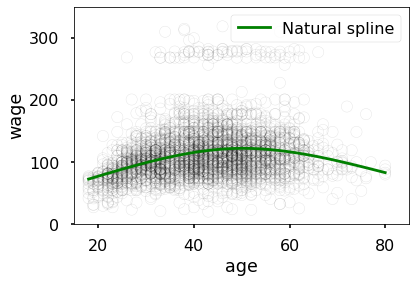

In [33]:
# Prediction on validation set
pred3 = fit3.predict(dmatrix("cr(valid, df=3)", {"valid": valid_x}, return_type='dataframe'))
# Calculating RMSE value
rms = sqrt(mean_squared_error(valid_y, pred3))
print(rms)

# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max(),70)
pred3 = fit3.predict(dmatrix("cr(xp, df=3)", {"xp": xp}, return_type='dataframe'))

# Plot the spline
plt.scatter(data.age, data.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred3,color='g', label='Natural spline')
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')
plt.show()

Choosing the Number and Locations of the Knots
When we fit a spline, where should we place the knots? One potential place would be the area of high variability, because in those regions the polynomial coefficients can change rapidly. Hence, one option is to place more knots in places where we feel the function might vary most rapidly, and to place fewer knots where it seems more stable.

While this option can work well, in practice it is common to place knots in a uniform fashion. One way to do this is to specify the desired degrees of freedom, and then have the software automatically place the corresponding number of knots at uniform quantiles of the data.

Another option is to try out different numbers of knots and see which produces the best looking curve.

<!--BOOK_INFORMATION-->

*This notebook contains an excerpt from the [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9), the content is also available at [Berkeley Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).*

# Cubic Spline Interpolation

In **cubic spline interpolation** (as shown in the following figure), the interpolating function is a set of piecewise cubic functions. 

Specifically, we assume that the points $(x_i, y_i)$ and $(x_{i+1}, y_{i+1})$ are joined by a cubic polynomial $S_i(x) = a_i x^3 + b_i x^2 + c_i x + d_i$ that is valid for $x_i \le x \le x_{i+1}$ for $i = 1,\ldots, n-1$. 

To find the interpolating function, we must first determine the coefficients $a_i, b_i, c_i, d_i$ for each of the cubic functions. For $n$ points, there are $n-1$ cubic functions to find, and each cubic function requires four coefficients. Therefore we have a total of $4(n-1)$ unknowns, and so we need $4(n-1)$ independent equations to find all the coefficients.

<img src="./images/17.03.01-Illustration_of_cubic_interpolation.jpg" alt="Cubic Interpolation" title="Illustration of cubic spline interpolation." width="200"/>

First we know that the cubic functions must intersect the data the points on the left and the right:

\begin{eqnarray*}
S_i(x_i) &=& y_i,\quad i = 1,\ldots,n-1,\\
S_i(x_{i+1}) &=& y_{i+1},\quad i = 1,\ldots,n-1,
\end{eqnarray*}

which gives us $2(n-1)$ equations. Next, we want each cubic function to join as smoothly with its neighbors as possible, so we constrain the splines to have continuous first and second derivatives at the data points $i = 2,\ldots,n-1$.

\begin{eqnarray*}
S^{\prime}_i(x_{i+1}) &=& S^{\prime}_{i+1}(x_{i+1}),\quad i = 1,\ldots,n-2,\\
S''_i(x_{i+1}) &=& S''_{i+1}(x_{i+1}),\quad i = 1,\ldots,n-2,
\end{eqnarray*}

which gives us $2(n-2)$ equations.

Two more equations are required to compute the coefficients of $S_i(x)$. These last two constraints are arbitrary, and they can be chosen to fit the circumstances of the interpolation being performed. A common set of final constraints is to assume that the second derivatives are zero at the endpoints. This means that the curve is a "straight line" at the end points. Explicitly,

\begin{eqnarray*}
S''_1(x_1) &=& 0\\
S''_{n-1}(x_n) &=& 0.
\end{eqnarray*}

In Python, we can use *scipy's* function *CubicSpline* to perform cubic spline interpolation. Note that the above constraints are not the same as the ones used by scipy's *CubicSpline* as default for performing cubic splines, there are different ways to add the final two constraints in scipy by setting the *bc_type* argument (see the help for *CubicSpline* to learn more about this). 

**TRY IT!** Use *CubicSpline* to plot the cubic spline interpolation of the data set *x = [0, 1, 2]* and *y = [1, 3, 2]* for $0\le x\le2$. 

In [1]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

In [3]:
x = [0, 1, 2]
y = [1, 3, 2]

# use bc_type = 'natural' adds the constraints as we described above
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0, 2, 100)
y_new = f(x_new)

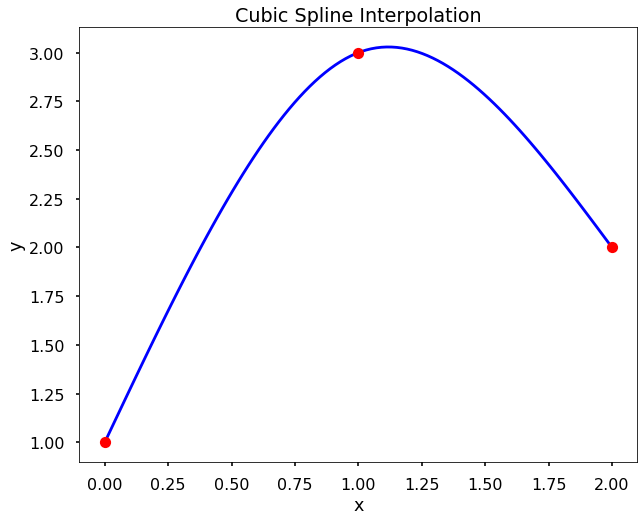

In [4]:
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

To determine the coefficients of each cubic function, we write out the constraints explicitly as a system of linear equations with $4(n-1)$ unknowns. For $n$ data points, the unknowns are the coefficients $a_i, b_i, c_i, d_i$ of the cubic spline, $S_i$ joining the points $x_i$ and $x_{i+1}$.

For the constraints $S_i(x_i) = y_i$ we have:
$$
\begin{array}{rrrrr}
a_1 x_1^3 + & b_1 x_1^2 +  & c_1 x_1 +  & d_1 = &y_1,\\ 
a_2 x_2^3 + & b_2 x_2^2 +  & c_2 x_2 +  & d_2 = &y_2,\\ 
\cdots\\ 
a_{n-1} x_{n-1}^3 + &b_{n-1} x_{n-1}^2 + &c_{n-1} x_{n-1} +& d_{n-1} =& y_{n-1}.
\end{array}
$$

For the constraints $S_i(x_{i+1}) = y_{i+1}$ we have:
$$
\begin{array}{rrrrr}
a_1 x_2^3 +&b_1 x_2^2 +&c_1 x_2 +&d_1 =& y_2,\\ 
a_2 x_3^3 +&b_2 x_3^2 +&c_2 x_3 +&d_2 =& y_3,\\
&&\cdots\\
a_{n-1} x_{n}^3 +&b_{n-1} x_{n}^2 +&c_{n-1} x_{n} +&d_{n-1} =& y_{n}.
\end{array}
$$

For the constraints $S^{\prime}_i(x_{i+1}) = S^{\prime}_{i+1}(x_{i+1})$ we have:
$$
\begin{array}{rrrrrr}
3a_1 x_2^2 +&2b_1 x_2 +&c_1 - &3a_2 x_2^2 - &2b_2 x_2 - &c_2 =0,\\ 
3a_2 x_3^2 +&2b_2 x_3 +&c_2 -& 3a_3 x_3^2 -& 2b_3 x_3 -& c_3 =0,\\ 
&&&\cdots&&,\\
3a_{n-2} x_{n-1}^2 +&2b_{n-2} x_{n-1} +&c_{n-2} -& 3a_{n-1} x_{n-1}^2 -& 2b_{n-1} x_{n-1} -& c_{n-1} =0.
\end{array}
$$

For the constraints $S''_i(x_{i+1}) = S''_{i+1}(x_{i+1})$ we have:

$$
\begin{array}{rrrrrr}
6a_1 x_2 +& 2b_1 -& 6a_2 x_2 -& 2b_2 =& 0,\\
6a_2 x_3 +& 2b_2 -& 6a_3 x_3 -& 2b_3 =& 0,\\
+&&\ldots -& \\
6a_{n-2} x_{n-1} +& 2b_{n-2} -& 6a_{n-1} x_{n-1} -& 2b_{n-1} =& 0.
\end{array}
$$

Finally for the endpoint constraints $S''_1(x_1) = 0$ and $S''_{n-1}(x_n) = 0$, we have:
$$
\begin{array}{rr}
6a_1 x_1 +& 2b_1 = 0,\\
6a_{n-1} x_n +&2b_{n-1} = 0.
\end{array}
$$

These equations are linear in the unknown coefficients $a_i, b_i, c_i$, and $d_i$. We can put them in matrix form and solve for the coefficients of each spline by left division. Remember that whenever we solve the matrix equation $Ax = b$ for $x$, we must make be sure that $A$ is square and invertible. In the case of finding cubic spline equations, the $A$ matrix is always square and invertible as long as the $x_i$ values in the data set are unique.

**TRY IT!** Find the cubic spline interpolation at *x = 1.5* based on the data *x = [0, 1, 2]*, *y = [1, 3, 2]*.

First we create the appropriate system of equations and find the coefficients of the cubic splines by solving the system in matrix form.}

The matrix form of the system of equations is:
$$
\left[\begin{array}{llllllll}
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 8 & 4 & 2 & 1\\
3 & 2 & 1 & 0 & -3 & -2 & -1 & 0\\
6 & 2 & 0 & 0 & -6 & -2 & 0 & 0\\
0 & 2 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 12 & 2 & 0 & 0
\end{array}\right]
\left[\begin{array}{c}
a_1 \\
b_1 \\
c_1 \\
d_1 \\
a_2 \\
b_2 \\
c_2 \\
d_2
\end{array}\right] =
\left[\begin{array}{c}
1 \\
3 \\
3 \\
2 \\
0 \\
0 \\
0 \\
0 \end{array}\right]
$$

In [5]:
b = np.array([1, 3, 3, 2, 0, 0, 0, 0])
b = b[:, np.newaxis]
A = np.array([[0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1], [1, 1, 1, 1, 0, 0, 0, 0], \
             [0, 0, 0, 0, 8, 4, 2, 1], [3, 2, 1, 0, -3, -2, -1, 0], [6, 2, 0, 0, -6, -2, 0, 0],\
             [0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 12, 2, 0, 0]])

In [6]:
np.dot(np.linalg.inv(A), b)

array([[-0.75],
       [ 0.  ],
       [ 2.75],
       [ 1.  ],
       [ 0.75],
       [-4.5 ],
       [ 7.25],
       [-0.5 ]])

Therefore, the two cubic polynomials are

\begin{eqnarray*}
S_1(x) &=& -.75x^3 + 2.75x + 1, \quad  for \quad 0 \le x \le 1\ and\\
S_2(x) &=& .75x^3 - 4.5x^2 + 7.25x - .5, \quad  for  \quad 1 \le x \le 2
\end{eqnarray*}

So for $x = 1.5$ we evaluate $S_2(1.5)$ and get an estimated value of 2.7813.

<!--NAVIGATION-->
< [17.2 Linear Interpolation](chapter17.02-Linear-Interpolation.ipynb)  | [Contents](Index.ipynb) | [17.4 Lagrange Polynomial Interpolation](chapter17.04-Lagrange-Polynomial-Interpolation.ipynb) >